## NLP Class Final Project Read Data

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import string
from nltk import download
import multiprocessing
import warnings
warnings.filterwarnings("ignore")
from pandarallel import pandarallel
import pickle
from gensim.models import LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.tokenize import word_tokenize
from multiprocessing import Pool
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from textblob.sentiments import NaiveBayesAnalyzer
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
download('stopwords')
download('wordnet')
nltk.download('punkt')


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
pyLDAvis.enable_notebook()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
!pip install vaderSentiment

In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [5]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import spacy
ner = spacy.load('en_core_web_sm')

In [7]:
news_df = pd.read_parquet('news_df_Sentiment.parquet', engine='pyarrow')
news_df.head()

/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation,0.79255,positive
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtr

In [8]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195330 entries, 17886 to 124998
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   url              195330 non-null  object        
 1   date             195330 non-null  datetime64[ns]
 2   language         195330 non-null  object        
 3   title            195330 non-null  object        
 4   text             195330 non-null  object        
 5   clean_text       195330 non-null  object        
 6   tokens           195330 non-null  object        
 7   trigrams         195330 non-null  object        
 8   dominant_topic   195330 non-null  int64         
 9   topic_name       195330 non-null  object        
 10  year             195330 non-null  int32         
 11  industry         195330 non-null  object        
 12  sentiment_score  190388 non-null  float64       
 13  sentiment        190388 non-null  object        
dtypes: datetime64[ns](1),

In [9]:
keywords_to_remove =[
    "Log In", "Sign Up", "Subscribe", "Read More", "Advertisement", "Privacy Policy", "Cookie Policy",
    "Terms of Use", "Terms and Conditions", "Search", "Menu", "Skip to content", "Footer", "Top", "Back to top",
    "Scroll down", "All Rights Reserved", "Copyright", "Copyright ©", "©", "Trademark", "Patent",
    "All rights reserved", "Copyright Notice", "Share", "Tweet", "Follow us", "Like", "Share on Facebook",
    "Tweet on Twitter", "Comments", "No Comments", "Add a Comment", "Post a Comment", "Leave a Reply",
    "Leave a Comment", "Newsletter", "Subscribe to our newsletter", "Print", "Print this page", "Download",
    "Download PDF", "Citation", "Site Map", "Feedback", "Contact Us", "FAQ", "Frequently Asked Questions", "Help",
    "Customer Service", "Next", "Previous", "Page 1", "Page 2", "Related Articles", "Related Posts", "Read Next",
    "Recommended"
]

def preprocess_text_v2(text):
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'\S*@\S*\s?', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'Listen • \d+:\d+', ' ', text)
    text = re.sub(r'Published \S+ \d+, \d+', ' ', text)
    text = re.sub(r'© \d+', ' ', text)
    for keyword in keywords_to_remove:
        text = re.sub(f'\\b{keyword}\\b', ' ', text, flags=re.IGNORECASE)
    
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stop and len(word) > 1 and len(word) < 18]
    
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

news_df['preprocessed_text'] = news_df['text'].apply(preprocess_text_v2)
news_df['preprocessed_title'] = news_df['title'].apply(preprocess_text_v2)
news_df['preprocessed_text'] = news_df['preprocessed_text'].str.replace('\s+', ' ', regex = True)
news_df['preprocessed_text'] = news_df['preprocessed_text'].str.replace('[^a-zA-Z0-9 @ . , : - _]', '', regex=True)
news_df['preprocessed_title'] = news_df['preprocessed_title'].str.replace('\s+', ' ', regex = True)
news_df['preprocessed_title'] = news_df['preprocessed_title'].str.replace('[^a-zA-Z0-9 @ . , : - _]', '', regex=True)


print(news_df.head())



<>:43: DeprecationWarning: invalid escape sequence '\s'
<>:45: DeprecationWarning: invalid escape sequence '\s'
<>:43: DeprecationWarning: invalid escape sequence '\s'
<>:45: DeprecationWarning: invalid escape sequence '\s'
/var/folders/ts/rdygcvgx7l539nxhb5qgw0gw0000gn/T/ipykernel_3685/4105930572.py:43: DeprecationWarning: invalid escape sequence '\s'
  news_df['preprocessed_text'] = news_df['preprocessed_text'].str.replace('\s+', ' ', regex = True)
/var/folders/ts/rdygcvgx7l539nxhb5qgw0gw0000gn/T/ipykernel_3685/4105930572.py:45: DeprecationWarning: invalid escape sequence '\s'
  news_df['preprocessed_title'] = news_df['preprocessed_title'].str.replace('\s+', ' ', regex = True)


                                                                                                                                                       url  \
17886                                                     https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper   
193040  https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured   
46698                               https://www.forbes.com/sites/chriswestfall/2023/12/12/googles-new-ai-gemini-beats-chatgpt-in-30-of-32-test-categories/   
97019                                                                                  https://www.producthunt.com/posts/free-real-time-design-by-collov-2   
84436                                                                https://ca.sports.yahoo.com/news/jpmorgan-debuts-ai-model-used-034919290.html?src=rss   

             date language  \
17886  2022-05-24    

In [10]:
news_df.to_parquet('news_df_NER1.parquet')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

In [11]:
news_df = pd.read_parquet('news_df_NER1.parquet', engine='pyarrow')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [12]:
news_df.head()

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment,preprocessed_text,preprocessed_title
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation,0.79255,positive,"images generated Googles latest texttoimage AI Verge Skip main content clock morearrow yes Sample images Googles new texttoimage AI. Image: Google collage Verge Filed under: Google images generated Googles latest texttoimage AI Imagen else thing James Vincent May 24, 2022, 7:38am EDT story Facebook Twitter sharing options sharing options for: images generated Googles latest texttoimage AI Linkedin Reddit Pocket Flipboard Email Theres new hot trend AI: texttoimage generators. Feed programs te...",images generated Googles latest texttoimage AI Verge
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremie

In [13]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195330 entries, 17886 to 124998
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   url                 195330 non-null  object        
 1   date                195330 non-null  datetime64[ns]
 2   language            195330 non-null  object        
 3   title               195330 non-null  object        
 4   text                195330 non-null  object        
 5   clean_text          195330 non-null  object        
 6   tokens              195330 non-null  object        
 7   trigrams            195330 non-null  object        
 8   dominant_topic      195330 non-null  int64         
 9   topic_name          195330 non-null  object        
 10  year                195330 non-null  int32         
 11  industry            195330 non-null  object        
 12  sentiment_score     190388 non-null  float64       
 13  sentiment           190388 non

def apply_ner(text):
    doc = ner(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

news_df['entities'] = news_df['preprocessed_text'].parallel_apply(apply_ner)
news_df2 = news_df.explode('entities')
news_df2['entities'] = news_df2['entities'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')

news_df2['entity'] = news_df2['entities'].astype(str).apply(lambda x: x.split(',')[0])
news_df2['label'] = news_df2['entities'].astype(str).apply(lambda x: x.split(',')[-1])
news_df2['entity'] = news_df2['entity'].str.replace('(', '').str.strip()
news_df2['label'] = news_df2['label'].str.replace(')', '').str.strip()

news_df2['label'].value_counts()

In [14]:

def apply_ner(text):
    doc = ner(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

news_df['entities'] = news_df['preprocessed_text'].parallel_apply(apply_ner)

entities_expanded = news_df.explode('entities')
entities_expanded[['entity', 'label']] = pd.DataFrame(entities_expanded['entities'].tolist(), index=entities_expanded.index)

label_counts = entities_expanded['label'].value_counts()
print(label_counts)


python(4341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


label
ORG            8244909
PERSON         3820192
GPE            2715479
DATE           2543867
CARDINAL       2087277
NORP            496073
TIME            407067
PRODUCT         309527
LOC             241094
ORDINAL         223958
WORK_OF_ART     131404
EVENT           110272
FAC             102410
MONEY            88091
LAW              57697
QUANTITY         34485
PERCENT          22978
LANGUAGE         16137
Name: count, dtype: int64


In [15]:
entities_expanded.head()

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment,preprocessed_text,preprocessed_title,entities,entity,label
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation,0.79255,positive,"images generated Googles latest texttoimage AI Verge Skip main content clock morearrow yes Sample images Googles new texttoimage AI. Image: Google collage Verge Filed under: Google images generated Googles latest texttoimage AI Imagen else thing James Vincent May 24, 2022, 7:38am EDT story Facebook Twitter sharing options sharing options for: images generated Googles latest texttoimage AI Linkedin Reddit Pocket Flipboard Email Theres new hot trend AI: texttoimage generators. Feed programs te...",images generated Googles latest texttoimage AI Verge,"(Googles, PERSON)",Googles,PERSON
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all shar

In [16]:
entities_expanded[entities_expanded['label'] == 'ORG']['entity'].value_counts(dropna = False).sort_values(ascending = False)\
.reset_index().head(100)

,entity,count
0,AI,1150209
1,Gray Media Group,128532
2,Microsoft,96259
3,Google,80003
4,PRNewswire,46794
5,2023 Gray Television,30937
6,Amazon,30344
7,AP,27630
8,IBM,27540
9,Apple,21227


In [17]:
companies = ['Samsung', 'NVIDIA', 'IBM','Nvidia','Apple','Microsoft','Google','Amazon','Meta','Tesla',
'Intel', 'OpenAI']

In [18]:
entities_expanded[entities_expanded['label'] == 'PRODUCT']['entity'].value_counts(dropna = False).sort_values(ascending = False)\
.reset_index().head(50)

,entity,count
0,Twitter,9442
1,ServicePrivacy,5998
2,Cancel,4944
3,JavaScript,3261
4,Cancel Read,3161
5,Altman,3076
6,CRM,2686
7,Fortune 500,2316
8,GPT4,2284
9,Excel,1970


In [19]:
company_techs= ['Bard', 'API', 'GPT', 'API', 'SAS', 'GPT3', 'AWS', 'Alexa', 'GPU' ]

In [20]:
entities_expanded[entities_expanded['label'] == 'PERSON']['entity'].value_counts(dropna = False).sort_values(ascending = False)\
.reset_index().head(60)

,entity,count
0,Sam Altman,17637
1,Biden,16442
2,Get Android,13686
3,WhatsApp,13416
4,Twitter,12116
5,Elon Musk,11017
6,Googles,9434
7,AI,8914
8,DescriptionAt Gray,8705
9,Musk,8216


In [21]:
people = ['Sam Altman', 'Elon Musk', 'Satya Nadella', 'Greg Brockman', 'Mark Zuckerberg']

entity
Microsoft    99335
Google       84494
Amazon       30344
IBM          27540
Apple        21227
NVIDIA       19809
Intel        15616
Meta         11976
Samsung       9828
Tesla         8188
OpenAI        2436
Name: count, dtype: int64


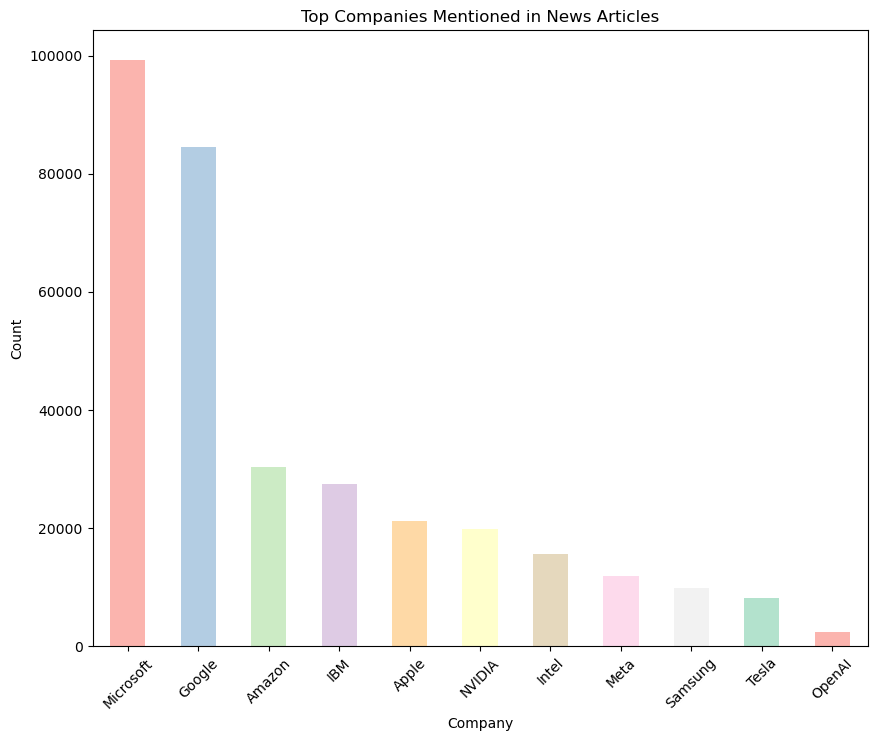

In [22]:
import pandas as pd


entities_expanded['entity'] = entities_expanded['entity'].replace({'Nvidia': 'NVIDIA', 'Googles': 'Google', 'Microsofts': 'Microsoft' })

top_companies_counts = entities_expanded[entities_expanded['entity'].isin(companies) & (entities_expanded['label'] == 'ORG')]['entity'].value_counts()

print(top_companies_counts)

colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2', '#b3e2cd']

plt.figure(figsize=(10, 8))
top_companies_counts.plot(kind='bar', color=colors)
plt.title('Top Companies Mentioned in News Articles')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
entities_expanded[entities_expanded['label'] == 'PRODUCT']['entity'].value_counts(dropna = False).sort_values(ascending = False)\
.reset_index().head(60)

,entity,count
0,Twitter,9442
1,ServicePrivacy,5998
2,Cancel,4944
3,JavaScript,3261
4,Cancel Read,3161
5,Altman,3076
6,CRM,2686
7,Fortune 500,2316
8,GPT4,2284
9,Excel,1970


person_standardized
Elon Musk          19233
Sam Altman         17923
Satya Nadella       6442
Mark Zuckerberg     3007
Greg Brockman       2640
Name: count, dtype: int64


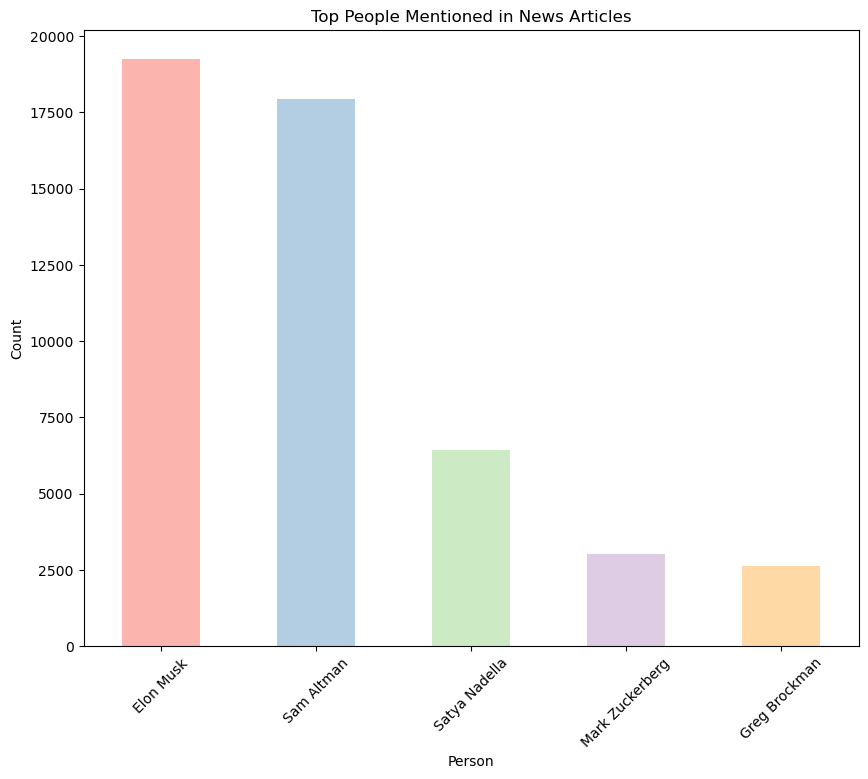

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def standardize_person_name(name):
    name_mapping = {
        'Altman': 'Sam Altman',
        'Nadella': 'Satya Nadella',
        'Musk': 'Elon Musk'
    }
    return name_mapping.get(name, name)

entities_expanded['person_standardized'] = entities_expanded.apply(
    lambda row: standardize_person_name(row['entity']) if row['label'] == 'PERSON' else row['entity'],
    axis=1
)

people = ['Sam Altman', 'Elon Musk', 'Satya Nadella', 'Greg Brockman', 'Mark Zuckerberg']

top_people_counts = entities_expanded[entities_expanded['person_standardized'].isin(people) & (entities_expanded['label'] == 'PERSON')]['person_standardized'].value_counts()

print(top_people_counts)

colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']

plt.figure(figsize=(10, 8))
top_people_counts.plot(kind='bar', color=colors)
plt.title('Top People Mentioned in News Articles')
plt.xlabel('Person')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data['date'] = pd.to_datetime(filtered_data['date'])

sentiment_trend_quarterly = filtered_data.groupby([pd.Grouper(key='date', freq='Q'), 'entity'])['sentiment_score'].mean().unstack()

plt.figure(figsize=(14, 8))

for company in sentiment_trend_quarterly.columns:
    plt.plot(sentiment_trend_quarterly.index, sentiment_trend_quarterly[company], marker='o', label=company)

plt.title('Quarterly Sentiment Analysis Trend per Company')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


entity  Elon Musk  Greg Brockman  Mark Zuckerberg  Sam Altman  Satya Nadella
year                                                                        
2020     0.551048       0.501604         0.602428    0.618219       0.634997
2021     0.543580       0.628173         0.519673    0.308659       0.548412
2022     0.535313       0.558461         0.493902    0.532085       0.572264
2023     0.523895       0.511123         0.507003    0.520211       0.530462
2024     0.527251       0.578272         0.529120    0.489253       0.506551


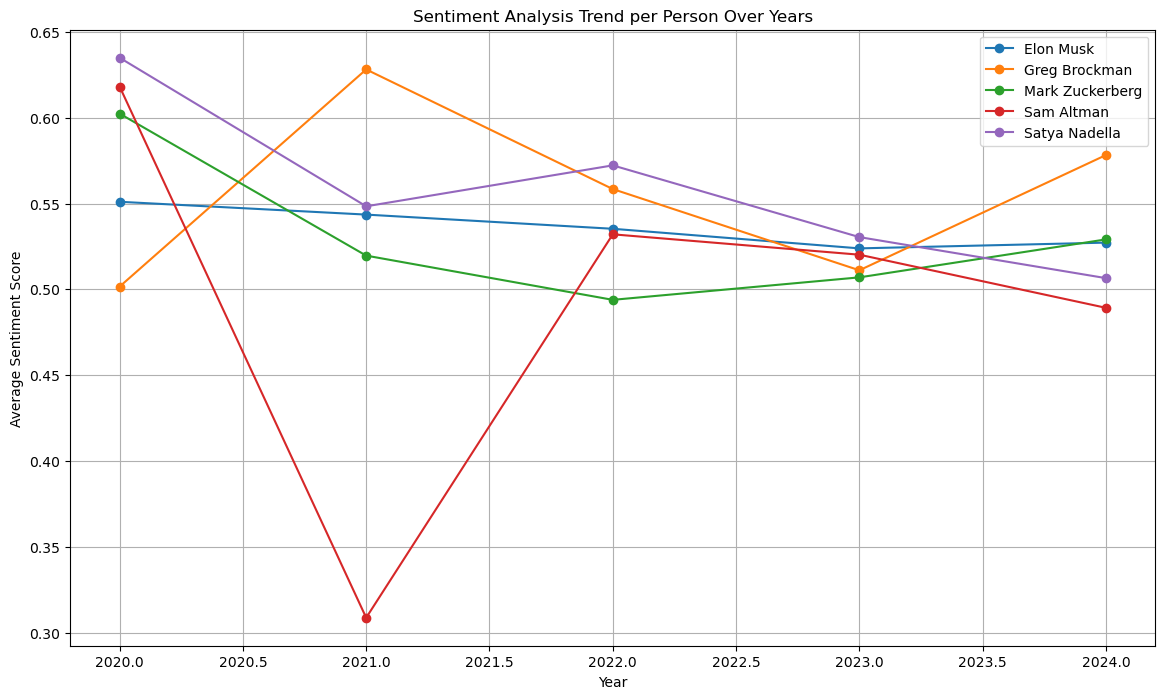

In [25]:
filtered_data_people = entities_expanded[entities_expanded['entity'].isin(people) & (entities_expanded['label'] == 'PERSON')]

sentiment_trend_people = filtered_data_people.groupby(['year', 'entity'])['sentiment_score'].mean().unstack()

print(sentiment_trend_people)

plt.figure(figsize=(14, 8))
for person in sentiment_trend_people.columns:
    plt.plot(sentiment_trend_people.index, sentiment_trend_people[person], marker='o', label=person)

plt.title('Sentiment Analysis Trend per Person Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
entities_expanded[entities_expanded['label'] == 'LOC']['entity'].value_counts(dropna = False).sort_values(ascending = False)\
.reset_index().head(30)

,entity,count
0,Europe,24047
1,North America,14743
2,Middle East,8334
3,Middle East Africa,6329
4,CDTUpdated:,5569
5,Silicon Valley,5420
6,Asia Pacific,5293
7,Africa,5242
8,Asia,4764
9,Latin America,4320


In [27]:
organization = entities_expanded[entities_expanded['label'] == 'ORG']

In [28]:
person = entities_expanded[entities_expanded['label'] == 'PERSON']

In [32]:
entities_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21652953 entries, 17886 to 124998
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   url                  object        
 1   date                 datetime64[ns]
 2   language             object        
 3   title                object        
 4   text                 object        
 5   clean_text           object        
 6   tokens               object        
 7   trigrams             object        
 8   dominant_topic       int64         
 9   topic_name           object        
 10  year                 int32         
 11  industry             object        
 12  sentiment_score      float64       
 13  sentiment            object        
 14  preprocessed_text    object        
 15  preprocessed_title   object        
 16  entities             object        
 17  entity               object        
 18  label                object        
 19  person_standardized  o

In [33]:
entities_expanded

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment,preprocessed_text,preprocessed_title,entities,entity,label,person_standardized
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation,0.79255,positive,"images generated Googles latest texttoimage AI Verge Skip main content clock morearrow yes Sample images Googles new texttoimage AI. Image: Google collage Verge Filed under: Google images generated Googles latest texttoimage AI Imagen else thing James Vincent May 24, 2022, 7:38am EDT story Facebook Twitter sharing options sharing options for: images generated Googles latest texttoimage AI Linkedin Reddit Pocket Flipboard Email Theres new hot trend AI: texttoimage generators. Feed programs te...",images generated Googles latest texttoimage AI Verge,"(Googles, PERSON)",Google,PERSON,Google
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter a

In [57]:
entities_expanded_sample= entities_expanded.sample(frac=0.01, random_state=42)


In [58]:
from joblib import Parallel, delayed
sectors = {
    
    "Healthcare": [
        "Doctor", "Pharmacist", "Dentist", "Surgeon", "Psychologist", "Physical Therapist", "Radiologist"
    ],
    "Technology": [
        "Software Engineer", "Data Scientist", "Cybersecurity Analyst", "Web Developer", "Systems Administrator", "IT Manager", "UX/UI Designer", "Database Administrator"
    ],
    "Education": ["Teacher", "School Principal", "Academic Advisor", "Librarian", "Education Consultant", "Special Education Teacher", "Tutor", "Lecturer"],
    "Engineering": ["Civil Engineer", "Mechanical Engineer", "Electrical Engineer", "Chemical Engineer", "Biomedical Engineer", "Environmental Engineer", "Aerospace Engineer", "Software Engineer"],
    "Finance": ["Accountant", "Financial Analyst", "Investment Banker", "Tax Advisor", "Auditor", "Financial Planner", "Insurance Agent", "Bank Teller"],
    "Business & Management": ["Project Manager", "Human Resources Manager", "Marketing Manager", "Sales Manager", "Consultant", "Operations Manager", "Business Analyst"],
    "Creative Arts & Design": ["Graphic Designer", "Photographer", "Interior Designer", "Fashion Designer", "Architect", "Animator", "Art Director", "Illustrator"],
    "Hospitality & Tourism": ["Hotel Manager", "Tour Guide", "Event Planner", "Flight Attendant", "Travel Agent", "Bartender", "Concierge"],
    "Legal": ["Lawyer", "Paralegal", "Legal Secretary", "Judge", "Legal Advisor", "Solicitor", "Barrister", "Court Reporter"],
    "Manufacturing & Construction": ["Construction Worker", "Electrician", "Plumber", "Welder", "Carpenter", "Machinist", "Quality Control Inspector", "Site Manager"],
    "Media & Communication": ["Public Relations Specialist", "Broadcaster", "Social Media Manager", "Content Creator", "Technical Writer"],
    "Public Service & Administration": ["Police Officer", "Firefighter", "Public Administrator", "Military Officer", "City Planner", "Civil Servant", "Diplomat", "Postal Worker"],
    "Science & Research": ["Research Scientist", "Laboratory Technician", "Geologist", "Environmental Scientist", "Biochemist", "Physicist", "Astronomer", "Clinical Researcher"],
    "Social Services": ["Social Worker", "Counselor", "Community Service Manager", "Non-Profit Organization Worker", "Child Welfare Worker", "Rehabilitation Counselor", "Case Manager", "Youth Worker"],
    "Transportation & Logistics": ["Truck Driver", "Logistics Manager", "Supply Chain Manager", "Flight Dispatcher", "Warehouse Manager", "Pilot", "Train Conductor", "Shipping Coordinator"]
}
occupations = [job for sector in sectors.values() for job in sector]

def find_job_titles_in_article(article):
    found_titles = []
    for job_title in occupations:
        if job_title.lower() in article.lower():
            found_titles.append(job_title)
    return found_titles

def parallel_find_job_titles(df):
    return df['preprocessed_text'].apply(find_job_titles_in_article)

job_n_sec = entities_expanded_sample.copy()

results = Parallel(n_jobs=-1)(delayed(parallel_find_job_titles)(job_n_sec.iloc[i:i+1000]) for i in range(0, job_n_sec.shape[0], 1000))

all_results = []
for sublist in results:
    all_results.extend(sublist)

# 결과를 데이터프레임에 추가
job_n_sec['job'] = all_results

# 결과 처리
job_n_sec2 = job_n_sec.explode('job')
job_n_sec3 = job_n_sec2[~job_n_sec2['job'].isna()]
result_counts = job_n_sec3['job'].value_counts(dropna=False).reset_index().head(50)

print(result_counts)

python(12895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
python(12900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12902) MallocStackLogging: can't turn off malloc stack logging because

                    job  count
0                Doctor  22702
1                 Pilot  21492
2                 Judge  20498
3               Teacher  18871
4                 Tutor  18824
5             Architect  18258
6                Lawyer  14650
7            Consultant   8754
8        Data Scientist   8117
9     Software Engineer   8018
10              Dentist   7462
11       Police Officer   6418
12         Photographer   4946
13             Diplomat   3866
14              Auditor   3794
15              Surgeon   3772
16          Firefighter   3518
17      Content Creator   2962
18          Radiologist   2961
19          Broadcaster   2443
20     Fashion Designer   1783
21   Research Scientist   1598
22         Psychologist   1549
23            Physicist   1548
24           Accountant   1517
25         Truck Driver   1388
26             Lecturer   1384
27     Flight Attendant   1295
28          Illustrator   1267
29      Project Manager   1103
30            Carpenter   1094
31      

In [59]:
from joblib import Parallel, delayed
import pandas as pd

job_n_sec = entities_expanded_sample.copy()

results = Parallel(n_jobs=-1)(
    delayed(parallel_find_job_titles)(job_n_sec.iloc[i:i+1000]) for i in range(0, job_n_sec.shape[0], 1000)
)

all_results = [item for sublist in results for item in sublist]

entities_expanded_sample['job'] = all_results

print(entities_expanded_sample.head())


                                                                                                                                                                                                                                             url  \
79515                                                                                                                                                                             https://finance.yahoo.com/news/ai-help-next-job-162940061.html   
173748  https://www.dailymail.co.uk/tvshowbiz/article-12573437/Its-AI-Armageddon-breathtaking-sci-fi-thriller-way-save-humans-destroying-adorable-robot-child-LARUSHKA-IVAN-ZADEH-reviews-Creator.html?ns_mchannel=rss&ito=1490&ns_campaign=1490   
25873                                                                                                                                                https://www.pogowasright.org/poland-investigates-chatgpt-after-alleged-data-privacy-breach/   
53737                   

In [54]:
entities_expanded_sample

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment,preprocessed_text,preprocessed_title,entities,entity,label,person_standardized,job,sector
79515,https://finance.yahoo.com/news/ai-help-next-job-162940061.html,2023-05-17,en,How job seekers are using AI to supercharge their job hunt,How job seekers are using AI to supercharge their job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SEARCH SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign in Mail Sign in to view your mail Finance Watchlists My Portfolio Markets Calendars Trending Tickers Stocks: Most Actives Stocks: Gainers Stocks: Losers Top ETFs Futures World In...,how job seeker using ai supercharge job hunt home mail news finance sport entertainment life shopping yahoo plus more yahoo finance yahoo finance sign mail sign view mail finance watchlists my portfolio market calendar trending ticker stock most active stock gainer stock loser etf future world index currency mutual fund option highest open interest option highest implied volatility u treasury bond rate currency converter news latest news yahoo finance original stock market news earnings p...,"[how, job, seeker, using, ai, supercharge, job, hunt, home, mail, news, finance, sport, entertainment, life, shopping, yahoo, plus, more, yahoo, finance, yahoo, finance, sign, mail, sign, view, mail, finance, watchlists, my, portfolio, market, calendar, trending, ticker, stock, most, active, stock, gainer, stock, loser, etf, future, world, index, currency, mutual, fund, option, highest, open, interest, option, highest, implied, volatility, u, treasury, bond, rate, currency, converter, news, ...","[job_seeker, using, ai, supercharge, job, hunt, home, mail, news, finance, sport, entertainment, life, shopping, yahoo, plus, yahoo, finance, yahoo, finance, sign, mail, sign, view, mail, finance, watchlists_my, portfolio, market, calendar, trending, ticker, stock, active, stock, gainer, stock, loser_etf, future, world, index, currency, mutual_fund, option, highest, open, interest, option_highest_implied, volatility, u, treasury_bond_rate, currency_converter, news, latest, news, yahoo, finan...",7,Financial Markets and AI Investment,2023,Finance and Markets,0.73810,positive,job seekers using AI supercharge job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign Mail Sign view mail Finance Watchlists Portfolio Markets Calendars Trending Tickers Stocks: Actives Stocks: Gainers Stocks: Losers ETFs Futures World Indices Currencies Mutual Funds Options: Highest Open Interest Options: Highest Implied Volatility US Treasury Bonds Rates Currency Converter News Latest News Yahoo Finance Originals Stock Marke...,job seekers using AI supercharge job hunt,"(CBS MoneyWatch, ORG)",CBS MoneyWatch,ORG,CBS MoneyWatch,"[Actor, Software Engineer, Software Engineer, CEO]","[sports_fitness, automotive, legal, entertainment, healthcare, media_communication, social_services, finance, science_research, manufacturing_construction, transportation_logistics, education, nonprofit, energy, real_estate, creative_arts_design, public_service_administration, technology, government, retail, business_management]"
173748,https://www.dailymail.co.uk/tvshowbiz/article-12573437/Its-AI-Armageddon-breathtaking-sci-fi-thriller-way-save-humans-destroying-adorable-robot-child-LARUSHKA-IVAN-ZADEH-reviews-Creator.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,2023-09-29,en,It's AI Armageddon - and in this breathtaking sci-fi thriller the only way to save humans is by destroying an adorable robot child: LARUSHKA IVAN-ZADEH reviews The Creator | Daily Mail Online,It's AI Armageddon - and in this breathtaking sci-fi thriller the only way to save humans is by destroying an adorable robot child: LARUSHKA IVAN-ZADEH reviews The Creator | Daily Mail Online\n\n \n \nHome\n\nShowbiz\n\nFemail\n\nRoyals\n\nHealth\n\nScience\n\nSports\n\nPol

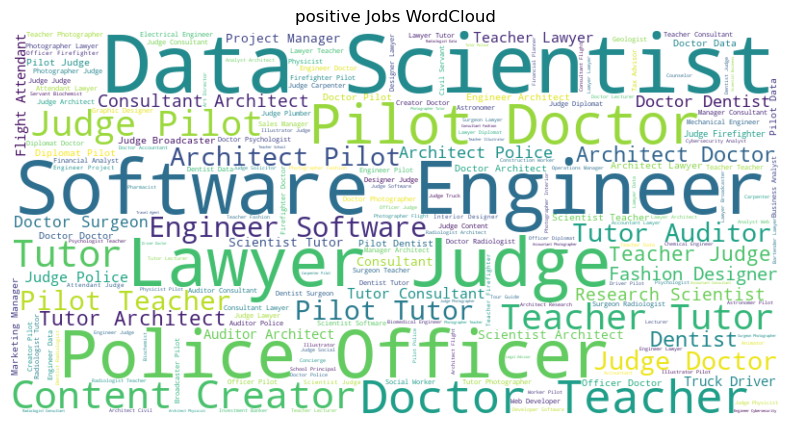

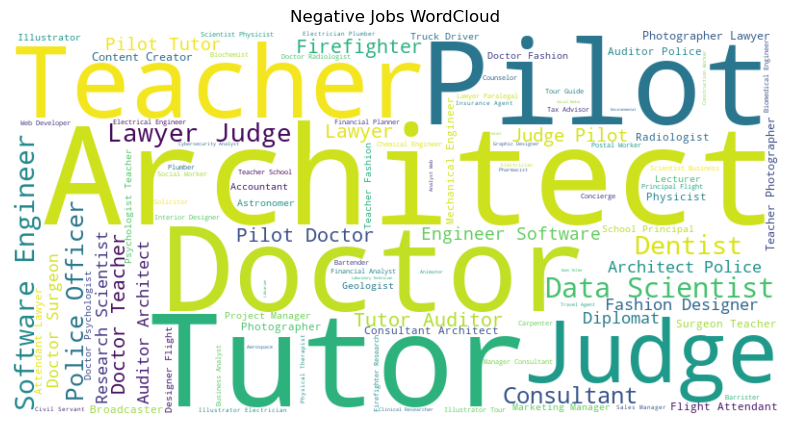

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_jobs = entities_expanded_sample[entities_expanded_sample['sentiment'] == 'positive']['job'].explode()
positive_jobs_text = ' '.join(positive_jobs.dropna())

negative_jobs = entities_expanded_sample[entities_expanded_sample['sentiment'] == 'negative']['job'].explode()
negative_jobs_text = ' '.join(negative_jobs.dropna())

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_jobs_text)

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_jobs_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('positive Jobs WordCloud')
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Jobs WordCloud')
plt.axis('off')

plt.show()


In [61]:
industry_keywords = {

    "automotive": [
        "automotive", "car", "vehicle", "auto", "motor vehicle", "electric vehicle", 
        "automobile engineering", "car manufacturing", "automotive design", "auto repair", "car sales", 
        "automotive technology", "driving", "motorsport", "vehicle safety", "auto parts", 
        "internal combustion engine", "hybrid vehicles", "autonomous vehicles", "car dealership", "automotive industry"
    ],
    "energy": [
        "energy", "power", "renewable energy", "fossil fuels", "solar energy", 
        "wind power", "electricity", "nuclear energy", "energy storage", "energy efficiency", "grid", 
        "sustainable energy", "oil and gas", "thermal energy", "bioenergy", "geothermal energy", 
        "energy policy", "power plant", "energy conservation", "smart grid", "energy transition"
    ],
    "real_estate": [
        "real estate", "property", "housing", "commercial real estate", "real estate development", 
        "property management", "real estate investment", "leasing", "mortgage", "land", "residential real estate", 
        "real estate market", "property law", "real estate financing", "building", "real estate agent", 
        "home ownership", "real estate appraisal", "land development", "property sales", "real estate economics"
    ],
    
    "sports_fitness": [
        "sports", "fitness", "athletics", "exercise", "workout", "gym", 
        "training", "physical activity", "sports management", "personal trainer", "sports medicine", "athletes", 
        "competitive sports", "recreation", "bodybuilding", "sporting goods", "physical education", 
        "sports psychology", "fitness industry", "sports nutrition", "team sports", "outdoor sports", "sports technology"
    ],
    "entertainment": [
        "entertainment", "media", "film", "music", "television", "video games", 
        "streaming", "cinema", "pop culture", "celebrity", "performance arts", "animation", "entertainment industry", 
        "show business", "live events", "theatre", "concert", "comedy", "entertainment technology", 
        "digital entertainment", "entertainment marketing", "visual arts", "entertainment law", "talent management"
    ],
    "nonprofit": [
        "nonprofit", "charity", "philanthropy", "volunteer", "community development", 
        "fundraising", "social impact", "ngo", "non-governmental organization", "donations", "social cause", 
        "humanitarian aid", "nonprofit management", "social justice", "community service", "advocacy", 
        "public charity", "nonprofit sector", "social enterprise", "nonprofit fundraising", "volunteer management"
    ],
    
    "government": [
        "government", "public sector", "policy", "public administration", "government services", 
        "legislation", "civic engagement", "government agencies", "political science", "public policy", 
        "civil service", "governance", "municipal government", "federal government", "state government", 
        "government relations", "public affairs", "e-government", "government procurement", "political affairs", 
        "governmental operations"
    ],
    "healthcare": [
        "medical", "hospital", "clinic", "healthcare", "surgery", "treatment", 
        "health insurance", "pharmaceutical", "fda", "cdc", "patient care"
    ],
    "technology": [
        "technology", "tech", "software", "hardware", "computing", "it", "ai", 
        "data", "cybersecurity", "cloud", "robotics", "silicon valley", "smartphone", "internet"
    ],
    "education": [
        "education", "school", "university", "college", "curriculum", "student", 
        "teacher", "academic", "scholarship", "tuition", "online learning", "mooc", "remote learning", "campus"
    ],
    "engineering": [
        "engineering", "infrastructure", "civil", "mechanical", "electrical", 
        "chemical", "biotech", "robotics", "cad", "aerospace", "automotive", "innovation"
    ],
    "finance": [
        "finance", "banking", "investment", "stock market", "wall street", "loan", 
        "credit", "financial services", "insurance", "budget", "economic", "cryptocurrency", "sec"
    ],
    "business_management": [
        "business", "corporate", "management", "entrepreneurship", "startup", 
        "ceo", "cfo", "marketing", "sales", "commerce", "leadership", "hr"
    ],
    "creative_arts_design": [
        "art", "design", "fashion", "photography", "creative", "gallery", 
        "illustration", "animation", "graphic design", "architecture", "interior design", "craft", "exhibition"
    ],
    "hospitality_tourism": [
        "hospitality", "tourism", "hotel", "restaurant", "travel", "leisure", 
        "culinary", "resort", "guest services", "flight", "booking", "tour", "destination"
    ],
    "legal": [
        "law", "legal", "court", "justice", "attorney", "lawyer", "judge", 
        "legislation", "litigation", "rights", "contract", "defendant", "plaintiff"
    ],
    "manufacturing_construction": [
        "manufacturing", "construction", "industrial", "factory", "production", 
        "building", "contractor", "engineering", "machinery", "development", "assembly", "safety regulations"
    ],
    "media_communication": [
        "media", "news", "communication", "journalism", "broadcasting", "press", 
        "publication", "social media", "content", "reporter", "editor", "public relations"
    ],
    "public_service_administration": [
        "public service", "government", "administration", "policy", "civic", 
        "military", "emergency", "fire department", "law enforcement", "city hall", "community service", "election"
    ],
    "science_research": [
        "science", "research", "experiment", "laboratory", "scientific", "study", 
        "discovery", "data analysis", "grant", "thesis", "publication", "peer review"
    ],
    "social_services": [
        "social work", "welfare", "non-profit", "community", "support", 
        "rehabilitation", "counseling", "outreach", "poverty", "homelessness", "ngo"
    ],
    "transportation_logistics": [
        "transportation", "logistics", "freight", "shipping", "cargo", "supply chain", 
        "warehouse", "distribution", "fleet", "transit", "infrastructure", "delivery"
    ],
    "agriculture": [
        "agriculture", "farming", "horticulture", "crop", "livestock", "ranch", 
        "orchard", "harvest", "agrarian", "agronomy", "agricultural technology", "sustainable agriculture",
        "soil", "irrigation", "agribusiness", "farm machinery", "organic farming", "rural", "pasture", "vineyard"
    ]
}

def find_sectors_in_article(article, industry_keywords):
    found_sectors = set()
    for sector, keywords in industry_keywords.items():
        for keyword in keywords:
            if keyword.lower() in article.lower():
                found_sectors.add(sector)
    return list(found_sectors)

def parallel_find_sectors(df, industry_keywords):
    sectors_found = df['preprocessed_text'].apply(find_sectors_in_article, args=(industry_keywords,))
    return sectors_found

job_n_sec = entities_expanded_sample.copy()

n_jobs = -1
n_partitions = 10 
partition_size = int(len(job_n_sec) / n_partitions)

results = Parallel(n_jobs=n_jobs)(
    delayed(parallel_find_sectors)(job_n_sec.iloc[i:i + partition_size], industry_keywords) for i in range(0, len(job_n_sec), partition_size))

job_n_sec['sectors_found'] = pd.concat(results)

print(job_n_sec[['preprocessed_text', 'sectors_found']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          preprocessed_text  \
79515   job seekers using AI supercharge job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign Mail Sign view mail Finance Watchlists Portfolio Markets Calendars Trending Tickers Stocks: Actives Stocks: Gainers Stocks: Losers ETFs Futures World Indices Currencies Mutual Funds Options: Highest Open Interest Options: Highest Implied Volatility US Treasury Bonds Rates Currency Converter News Latest News Yahoo Finance Origin

In [53]:
from joblib import Parallel, delayed
import pandas as pd


def find_sectors_in_article(article, industry_keywords):
    found_sectors = set()
    for sector, keywords in industry_keywords.items():
        if any(keyword.lower() in article.lower() for keyword in keywords):
            found_sectors.add(sector)
    return list(found_sectors)

def parallel_find_sectors(df_split, industry_keywords):
    return [find_sectors_in_article(article, industry_keywords) for article in df_split['preprocessed_text']]

job_n_sec = entities_expanded_sample.copy()

n_jobs = -1

results = Parallel(n_jobs=n_jobs)(
    delayed(parallel_find_sectors)(job_n_sec.iloc[i:i + 1000], industry_keywords) for i in range(0, len(job_n_sec), 1000))

sectors_found = [sector for sublist in results for sector in sublist]

entities_expanded_sample['sector'] = sectors_found

print(entities_expanded_sample[['preprocessed_text', 'sector']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          preprocessed_text  \
79515   job seekers using AI supercharge job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign Mail Sign view mail Finance Watchlists Portfolio Markets Calendars Trending Tickers Stocks: Actives Stocks: Gainers Stocks: Losers ETFs Futures World Indices Currencies Mutual Funds Options: Highest Open Interest Options: Highest Implied Volatility US Treasury Bonds Rates Currency Converter News Latest News Yahoo Finance Origin

In [ ]:
from joblib import Parallel, delayed
import pandas as pd

job_n_sec = entities_expanded_sample.copy()

results = Parallel(n_jobs=-1)(
    delayed(parallel_find_job_titles)(job_n_sec.iloc[i:i+1000]) for i in range(0, job_n_sec.shape[0], 1000)
)

all_results = [item for sublist in results for item in sublist]

entities_expanded_sample['job'] = all_results

print(entities_expanded_sample.head())


In [66]:
entities_expanded_sample

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment,preprocessed_text,preprocessed_title,entities,entity,label,person_standardized,job
79515,https://finance.yahoo.com/news/ai-help-next-job-162940061.html,2023-05-17,en,How job seekers are using AI to supercharge their job hunt,How job seekers are using AI to supercharge their job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SEARCH SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign in Mail Sign in to view your mail Finance Watchlists My Portfolio Markets Calendars Trending Tickers Stocks: Most Actives Stocks: Gainers Stocks: Losers Top ETFs Futures World In...,how job seeker using ai supercharge job hunt home mail news finance sport entertainment life shopping yahoo plus more yahoo finance yahoo finance sign mail sign view mail finance watchlists my portfolio market calendar trending ticker stock most active stock gainer stock loser etf future world index currency mutual fund option highest open interest option highest implied volatility u treasury bond rate currency converter news latest news yahoo finance original stock market news earnings p...,"[how, job, seeker, using, ai, supercharge, job, hunt, home, mail, news, finance, sport, entertainment, life, shopping, yahoo, plus, more, yahoo, finance, yahoo, finance, sign, mail, sign, view, mail, finance, watchlists, my, portfolio, market, calendar, trending, ticker, stock, most, active, stock, gainer, stock, loser, etf, future, world, index, currency, mutual, fund, option, highest, open, interest, option, highest, implied, volatility, u, treasury, bond, rate, currency, converter, news, ...","[job_seeker, using, ai, supercharge, job, hunt, home, mail, news, finance, sport, entertainment, life, shopping, yahoo, plus, yahoo, finance, yahoo, finance, sign, mail, sign, view, mail, finance, watchlists_my, portfolio, market, calendar, trending, ticker, stock, active, stock, gainer, stock, loser_etf, future, world, index, currency, mutual_fund, option, highest, open, interest, option_highest_implied, volatility, u, treasury_bond_rate, currency_converter, news, latest, news, yahoo, finan...",7,Financial Markets and AI Investment,2023,Finance and Markets,0.73810,positive,job seekers using AI supercharge job hunt HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SHOPPING YAHOO PLUS MORE... Yahoo Finance Yahoo Finance Sign Mail Sign view mail Finance Watchlists Portfolio Markets Calendars Trending Tickers Stocks: Actives Stocks: Gainers Stocks: Losers ETFs Futures World Indices Currencies Mutual Funds Options: Highest Open Interest Options: Highest Implied Volatility US Treasury Bonds Rates Currency Converter News Latest News Yahoo Finance Originals Stock Marke...,job seekers using AI supercharge job hunt,"(CBS MoneyWatch, ORG)",CBS MoneyWatch,ORG,CBS MoneyWatch,"[Software Engineer, Software Engineer]"
173748,https://www.dailymail.co.uk/tvshowbiz/article-12573437/Its-AI-Armageddon-breathtaking-sci-fi-thriller-way-save-humans-destroying-adorable-robot-child-LARUSHKA-IVAN-ZADEH-reviews-Creator.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,2023-09-29,en,It's AI Armageddon - and in this breathtaking sci-fi thriller the only way to save humans is by destroying an adorable robot child: LARUSHKA IVAN-ZADEH reviews The Creator | Daily Mail Online,It's AI Armageddon - and in this breathtaking sci-fi thriller the only way to save humans is by destroying an adorable robot child: LARUSHKA IVAN-ZADEH reviews The Creator | Daily Mail Online\n\n \n \nHome\n\nShowbiz\n\nFemail\n\nRoyals\n\nHealth\n\nScience\n\nSports\n\nPolitics\n\nMoney\n\nU.K.\n\nVideo\n\nTravel\n\nShop\nHeadlines\n \n U.K. Showbiz\n \n \n \n Meghan Markle\n ...,it ai armageddon breathtaking thriller way save human destroying adorable robot child larushka review the creator daily mail online home showbiz femail royal health science sport politics money video travel shop headline showbiz meghan markle

In [67]:
from joblib import Parallel, delayed
import pandas as pd


def find_sectors_in_article(article, industry_keywords):
    found_sectors = set()
    for sector, keywords in industry_keywords.items():
        if any(keyword.lower() in article.lower() for keyword in keywords):
            found_sectors.add(sector)
    return list(found_sectors)

def parallel_find_sectors(df_split, industry_keywords):
    return [find_sectors_in_article(article, industry_keywords) for article in df_split['preprocessed_text']]

job_n_sec = entities_expanded_sample.copy()

results = Parallel(n_jobs=-1)(
    delayed(parallel_find_sectors)(job_n_sec.iloc[i:i+1000], industry_keywords) for i in range(0, len(job_n_sec), 1000))

# 결과를 하나의 리스트로 병합하여 'sector' 컬럼에 추가
sectors_found = [sector for sublist in results for sector in sublist]
entities_expanded_sample['sector'] = sectors_found

# 결과 확인
print(entities_expanded_sample.head())


python(13546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
python(13551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13553) MallocStackLogging: can't turn off malloc stack logging because

                                                                                                                                                                                                                                             url  \
79515                                                                                                                                                                             https://finance.yahoo.com/news/ai-help-next-job-162940061.html   
173748  https://www.dailymail.co.uk/tvshowbiz/article-12573437/Its-AI-Armageddon-breathtaking-sci-fi-thriller-way-save-humans-destroying-adorable-robot-child-LARUSHKA-IVAN-ZADEH-reviews-Creator.html?ns_mchannel=rss&ito=1490&ns_campaign=1490   
25873                                                                                                                                                https://www.pogowasright.org/poland-investigates-chatgpt-after-alleged-data-privacy-breach/   
53737                   

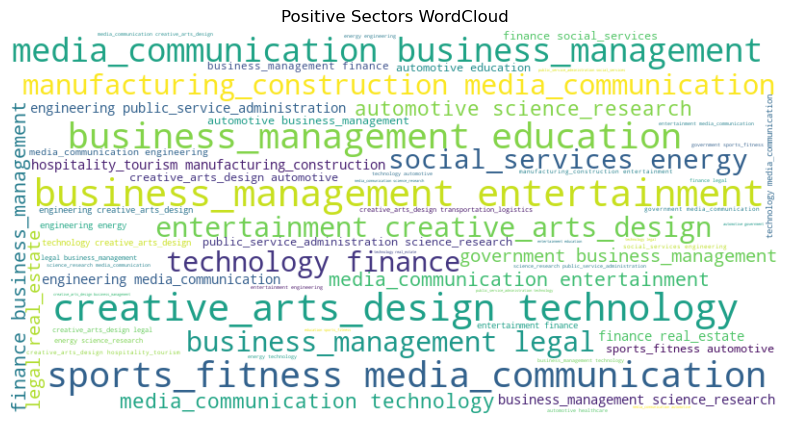

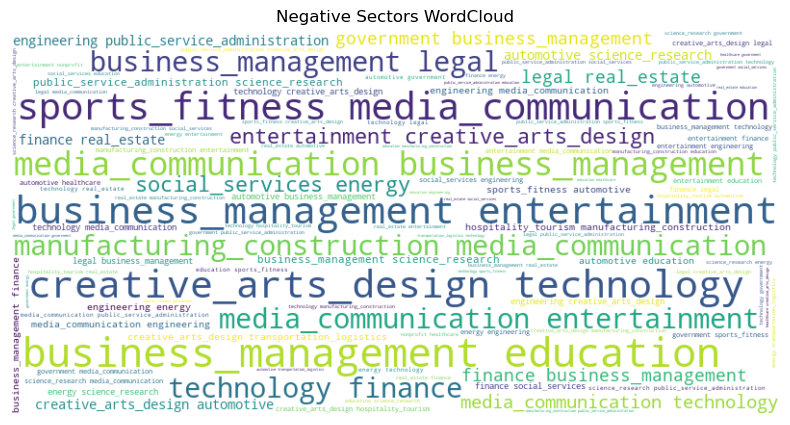

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_sectors = entities_expanded_sample[entities_expanded_sample['sentiment'] == 'positive']['sector'].explode()
positive_sectors_text = ' '.join(positive_sectors.dropna())

negative_sectors = entities_expanded_sample[entities_expanded_sample['sentiment'] == 'negative']['sector'].explode()
negative_sectors_text = ' '.join(negative_sectors.dropna())

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_sectors_text)

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_sectors_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sectors WordCloud')
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sectors WordCloud')
plt.axis('off')

plt.show()


In [69]:


exploded_sectors = entities_expanded_sample.explode('sector')

top_3_industries_positive = exploded_sectors[exploded_sectors['sentiment_score'] > 0].groupby('sector')['sentiment_score'].mean().nlargest(3)
mean_positive_score_top_3 = top_3_industries_positive.mean()

bottom_3_industries_negative = exploded_sectors[exploded_sectors['sentiment_score'] < 0].groupby('sector')['sentiment_score'].mean().nsmallest(3)
mean_negative_score_bottom_3 = bottom_3_industries_negative.mean()

top_3_industries_positive, mean_positive_score_top_3, bottom_3_industries_negative, mean_negative_score_bottom_3


(sector
 healthcare          0.592187
 education           0.592032
 science_research    0.591995
 Name: sentiment_score, dtype: float64,
 0.5920714735897578,
 sector
 energy                          -0.500795
 government                      -0.500610
 public_service_administration   -0.499594
 Name: sentiment_score, dtype: float64,
 -0.5003331931619396)